# Gender Classification Model

This notebook demonstrates the process of building a classification model to predict Gender using a dataset. The workflow includes data collection, cleaning, splitting, training, and evaluating the model.

## 1. Importing Libraries

We'll start by importing the necessary libraries for data manipulation, machine learning, and visualization.

In [36]:
import pandas as pd # For data manipulation with DataFrames
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.naive_bayes import BernoulliNB # For Naive Bayes classification
import pickle # For saving the trained model

# 2. Data Collection
We'll load the dataset into a pandas DataFrame. The dataset contains information about patients and whether they have heart disease.

In [37]:
# Load the dataset
file = pd.read_csv("Gender_classification_dataset.csv")

# Display the first few rows of the dataset
file.head(20)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


# 3. Data Cleaning
We'll check for missing values in the dataset and handle them by filling with the median of each column.

In [38]:
# Check for missing values in the dataset
file.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

The output shows the number of missing values in each column. To address these, we fill missing values with the median of each column.

In [39]:
#  look for data types

print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB
None


In [40]:
# Fill missing values with the median of each column
file = file.fillna(file.median())

# Verify that there are no more missing values
file.isna().sum()


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# 4. Data Splitting
We'll split the data into features (X) and labels (y). The features are the input variables, and the labels are the target variable we want to predict.

In [41]:
# Split the data into features and labels
x = file.drop("gender", axis=1)
y = file["gender"]


## Visualizing the Distribution of Target Classes
Before splitting the data, let's visualize the distribution of the target classes to understand the balance between them.

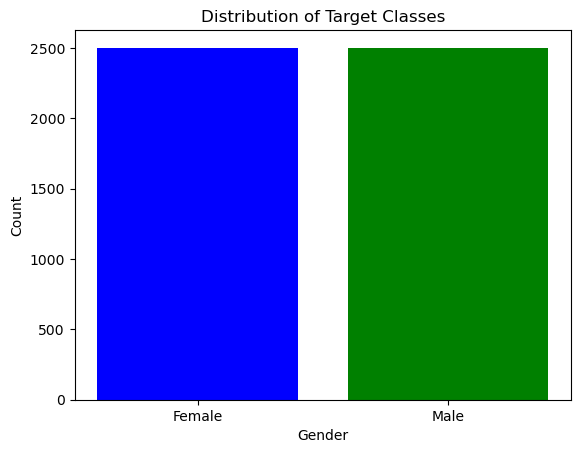

In [43]:
# Plot the distribution of the target classes
x1, x0 = y.value_counts() # count individual values and save them in corresponding variables.
plt.bar(['Female', 'Male'], [x0, x1], color=['blue', 'green'])
plt.xlabel('Gender') # giving label to x-axis
plt.ylabel('Count') # Giving label to y-axis
plt.title('Distribution of Target Classes') # Name of the plot
plt.show()


# 5. Training and Testing Split
We'll split the dataset into training and testing sets. The training set is used to build the model, while the testing set is used to evaluate its performance.

In [44]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 6. Model Training and Evaluation
We'll train various classification models and evaluate their performance.

### Naive Bayes
First, we'll train a Naive Bayes classifier and evaluate its accuracy.

In [45]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train the Naive Bayes model
model = BernoulliNB()
model.fit(x_train, y_train)

# Evaluate the model
accuracy = model.score(x_test, y_test)
print(f"Naive Bayes Accuracy: {accuracy* 100:.4f}%")


Naive Bayes Accuracy: 95.7043%


### Support Vector Machine (SVM)
Next, we'll train a Support Vector Machine (SVM) classifier and evaluate its performance.

In [46]:
from sklearn import svm

# Initialize and train the SVM model
model = svm.SVC()
model.fit(x_train, y_train)

# Evaluate the model
accuracy = model.score(x_test, y_test)
print(f"SVM Accuracy: {accuracy*100:.4f}%")


SVM Accuracy: 96.3037%


# Random Forest Classifier (Selected)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model  =  RandomForestClassifier(n_jobs=100)
model.fit(x_train, y_train)

# Evaluate the model
accuracy = model.score(x_test, y_test)
print(f"Random Forest classifier Accuracy: {accuracy*100:.4f}%")

Random Forest classifier Accuracy: 96.2038%


# 7. Model Selection and Finalization
After comparing the models, we see that the Random Forest classifier performs the best. We'll save this model for future use.

In [48]:
import pickle

# Save the trained Naive Bayes model to a file
filename = 'Random_Forest_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))


# 8. Conclusion
In this notebook, we:

- Loaded and cleaned the dataset.
- Split the data into training and testing sets.
- Trained and evaluated various classification models.
- Selected the best-performing model and saved it for future use.
- The Random Forest Classifier achieved the highest accuracy and is therefore chosen as the final model.